# **Raising**

In [285]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import arff
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings('ignore')

In [286]:
url='Raisin_Dataset.arff'
# Leer el archivo ARFF
data, meta = arff.loadarff(url)

# Convertir a un DataFrame de pandas
df = pd.DataFrame(data)

# Mostrar las primeras filas del DataFrame
df.head()


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,b'Kecimen'
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,b'Kecimen'
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,b'Kecimen'
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,b'Kecimen'
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,b'Kecimen'


In [287]:
len(df)

900

## **Mising Values**

In [288]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

In [289]:
df.duplicated().sum()

0

In [290]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,900.0,87804.127778,39002.111390,25387.000000,59348.000000,78902.000000,105028.250000,235047.000000
MajorAxisLength,900.0,430.929950,116.035121,225.629541,345.442898,407.803951,494.187014,997.291941
MinorAxisLength,900.0,254.488133,49.988902,143.710872,219.111126,247.848409,279.888575,492.275279
Eccentricity,900.0,0.781542,0.090318,0.348730,0.741766,0.798846,0.842571,0.962124
ConvexArea,900.0,91186.090000,40769.290132,26139.000000,61513.250000,81651.000000,108375.750000,278217.000000
Extent,900.0,0.699508,0.053468,0.379856,0.670869,0.707367,0.734991,0.835455
Perimeter,900.0,1165.906636,273.764315,619.074000,966.410750,1119.509000,1308.389750,2697.753000


In [291]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    float64
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    float64
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(7), object(1)
memory usage: 56.4+ KB


In [292]:
df['Class'].value_counts()

Class
b'Kecimen'    450
b'Besni'      450
Name: count, dtype: int64

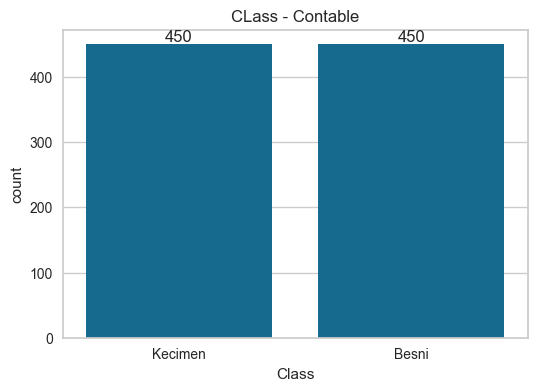

In [293]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x='Class', data=df)
ax.bar_label(ax.containers[0])
plt.title('CLass - Contable',fontsize=12)
plt.show()

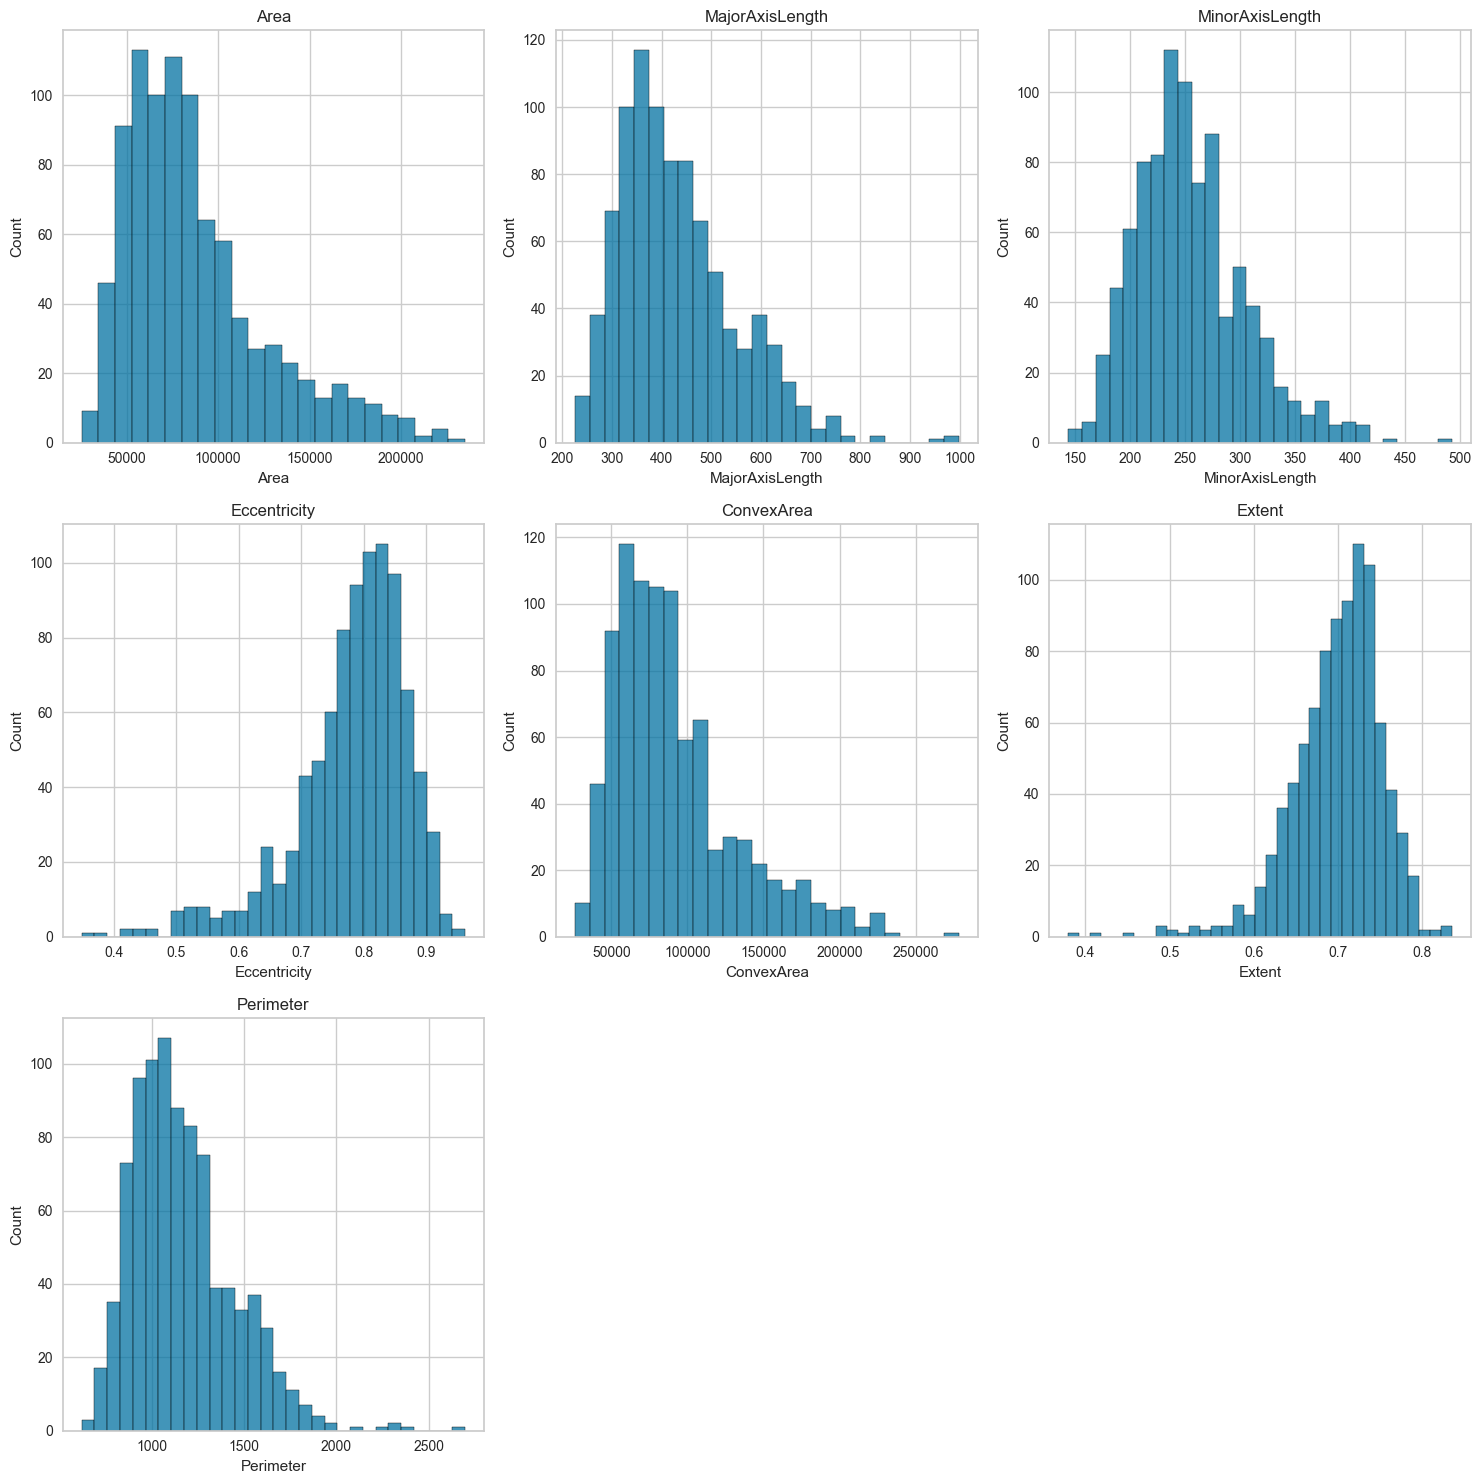

In [294]:
num=df.select_dtypes(include='number').columns
# Crear una figura y una cuadrícula de subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
# Aplanar la matriz de ejes para facilitar la iteración
axes = axes.flatten()
# Graficar cada columna en un subplot
for i, col in enumerate(num):
    sns.histplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(col)
# Eliminar los subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

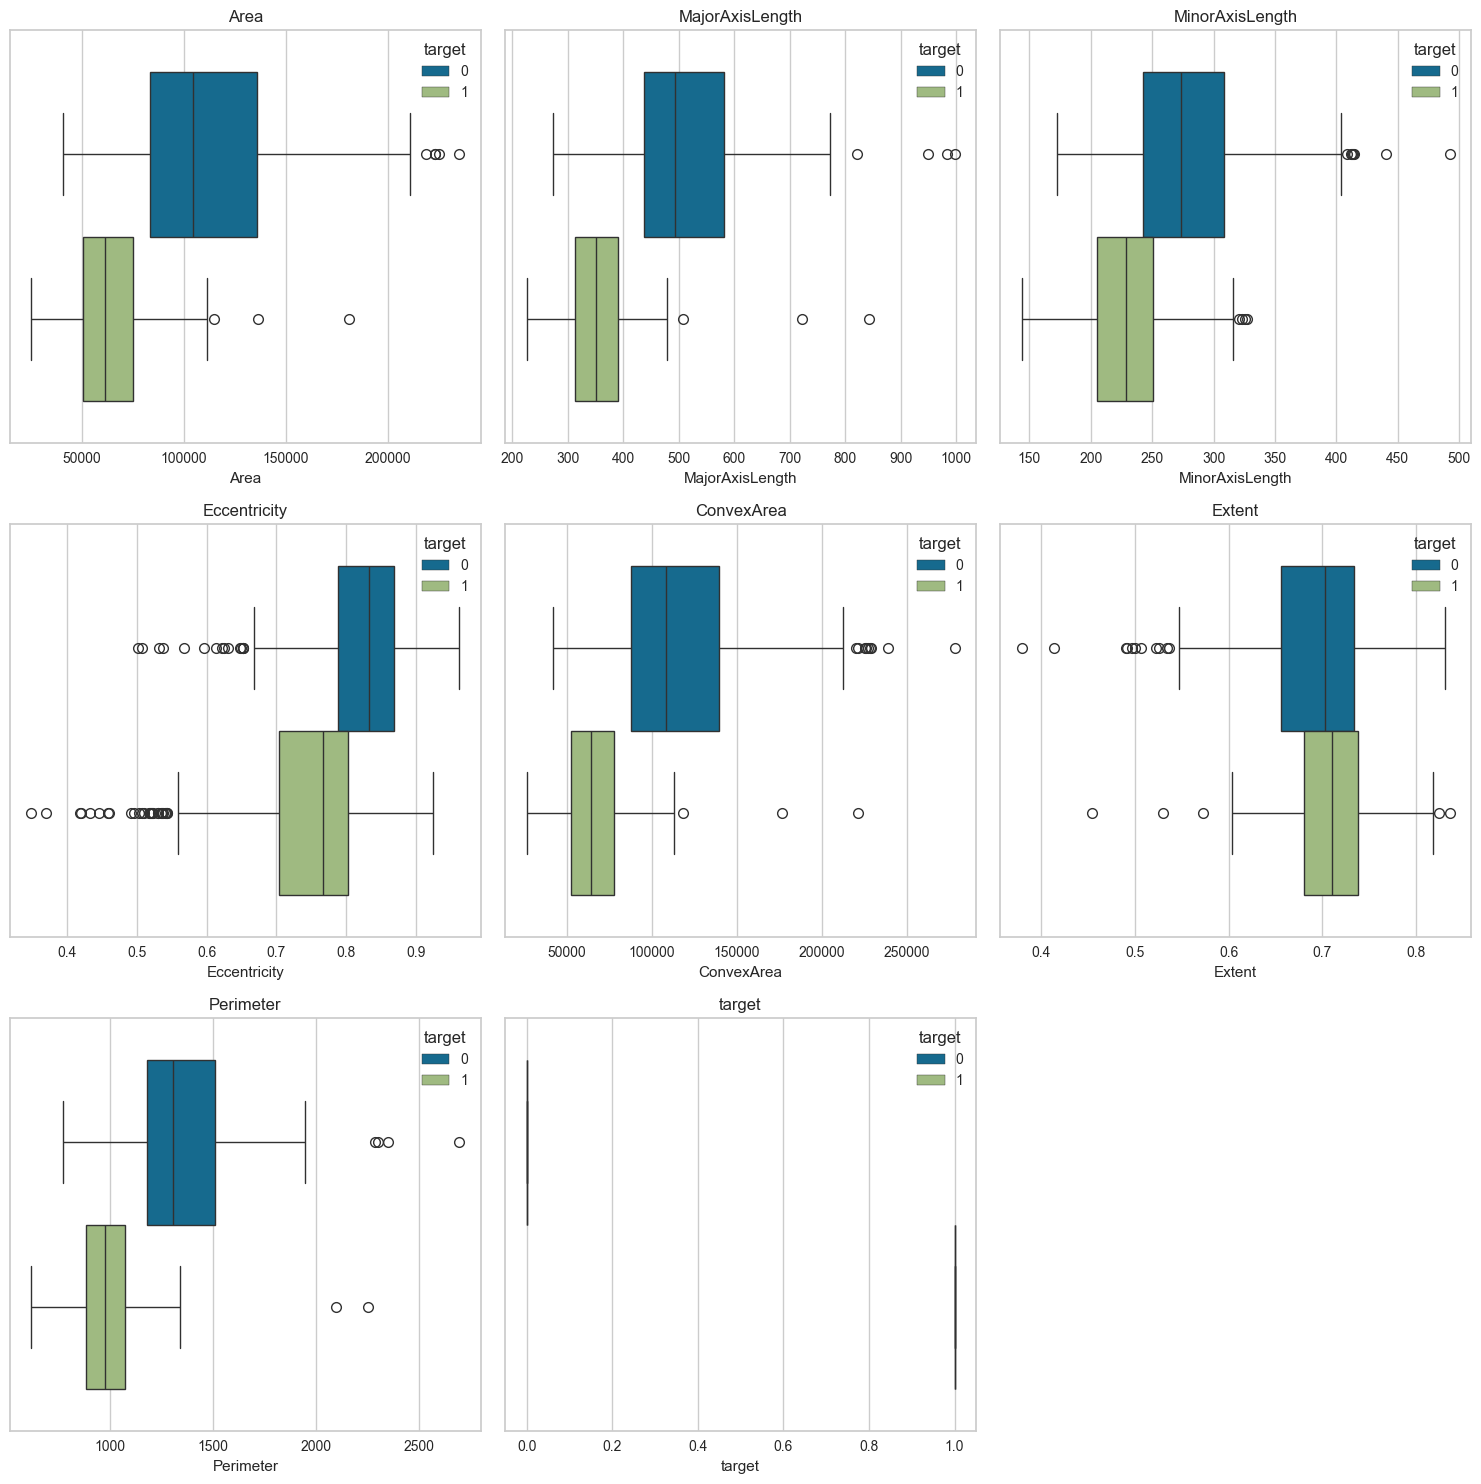

In [322]:
num=df.select_dtypes(include='number').columns
# Crear una figura y una cuadrícula de subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
# Aplanar la matriz de ejes para facilitar la iteración
axes = axes.flatten()
# Graficar cada columna en un subplot
for i, col in enumerate(num):
    sns.boxplot(data=df, x=col, ax=axes[i],hue='target')
    axes[i].set_title(col)
# Eliminar los subplots vacíos
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

## **Procesar la data**

In [295]:
labelencoder=LabelEncoder()
df['target']=labelencoder.fit_transform(df['Class'])
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class,target
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,b'Kecimen',1
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,b'Kecimen',1
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,b'Kecimen',1
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,b'Kecimen',1
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,b'Kecimen',1


In [296]:
besni_count = df[df['target'] == 0].shape[0]
kecimen_count = df[df['target'] == 1].shape[0]

print(f"Besni (0) count: {besni_count}")
print(f"Keçimen (1) count: {kecimen_count}")

Besni (0) count: 450
Keçimen (1) count: 450


In [297]:
df=df.drop(['Class'], axis=1)

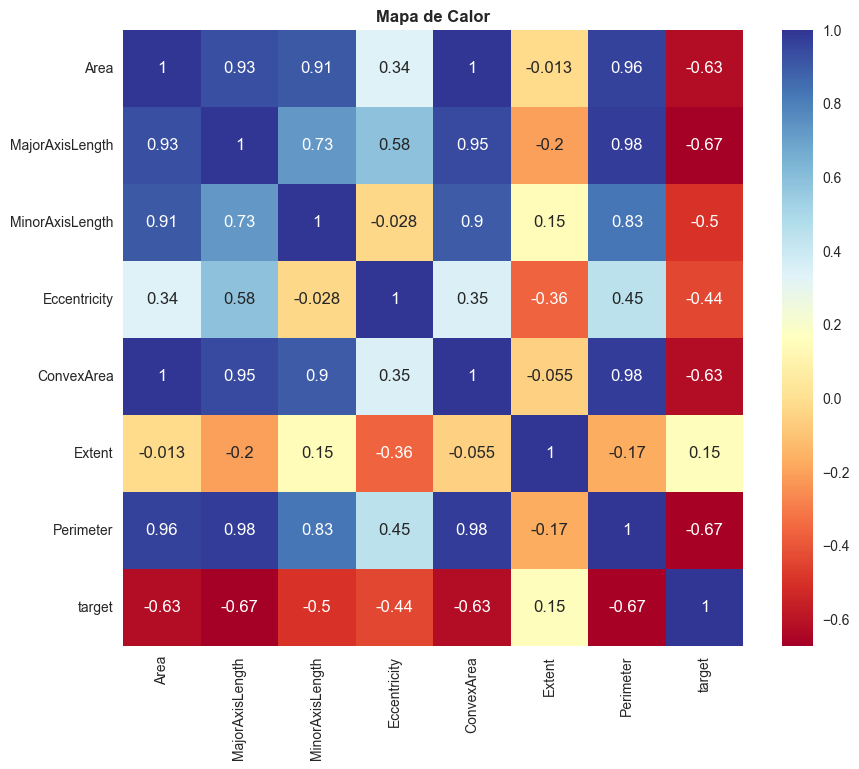

In [298]:
plt.figure(figsize=(10,8))
sns.heatmap(data=df.corr(),annot=True,cmap='RdYlBu')
plt.title('Mapa de Calor',fontsize=12,weight='bold')
plt.show()

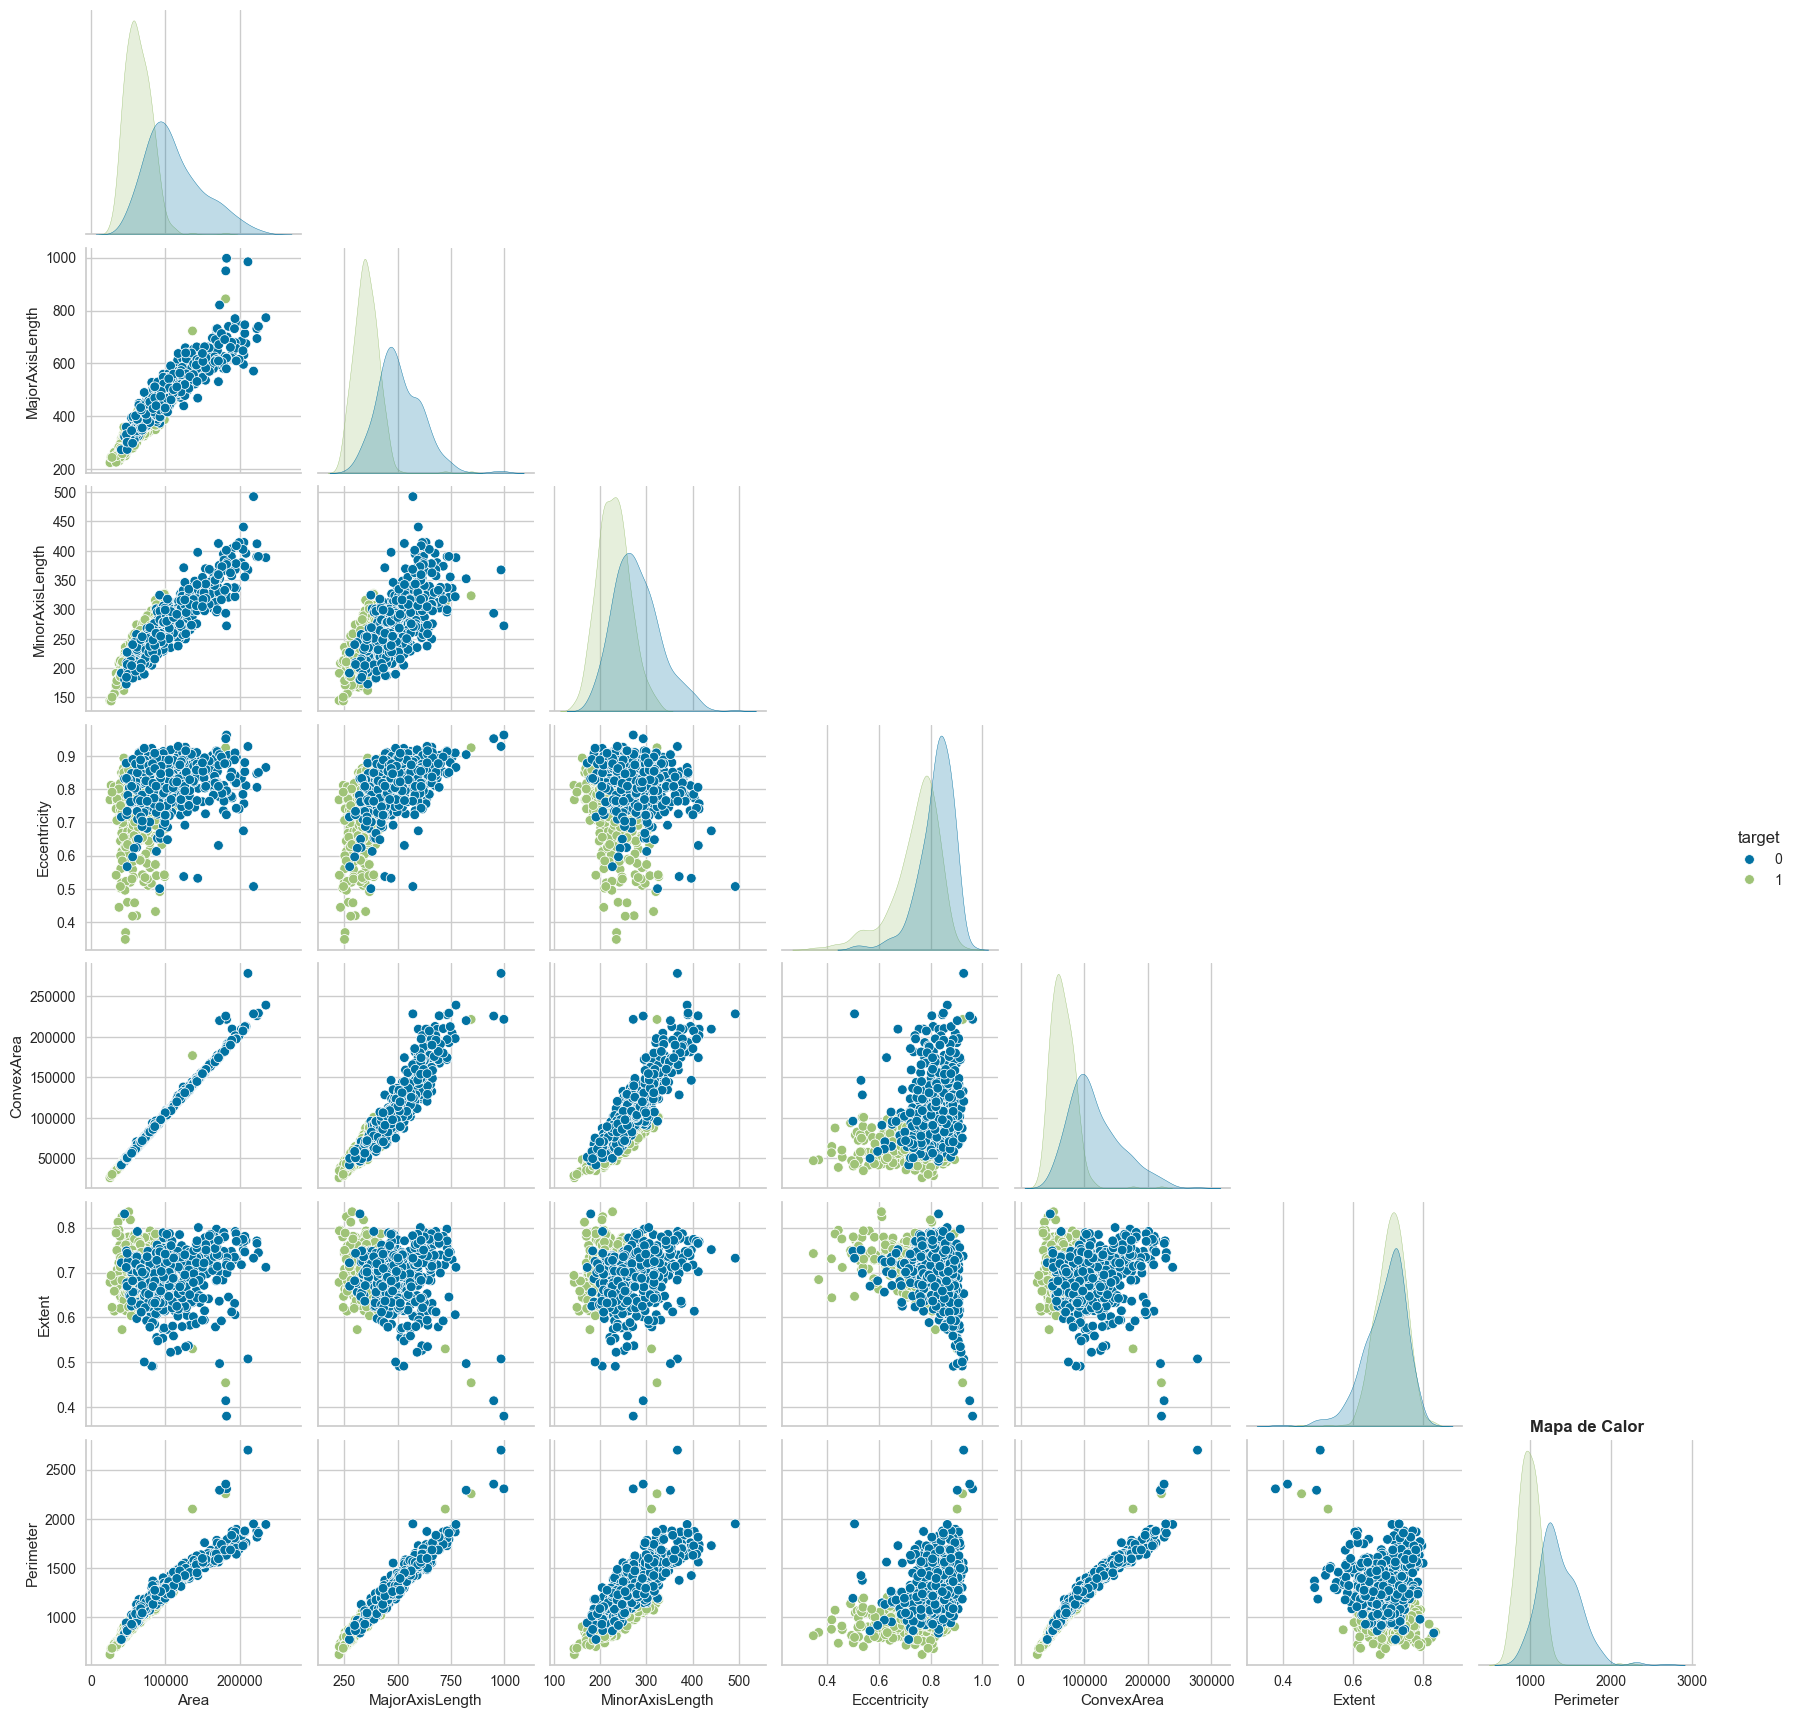

In [299]:
sns.pairplot(data=df, corner=True, hue='target')
plt.title('Mapa de Calor',fontsize=12,weight='bold')
plt.show()

In [300]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,target
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,1
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,1
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,1
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,1
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,1


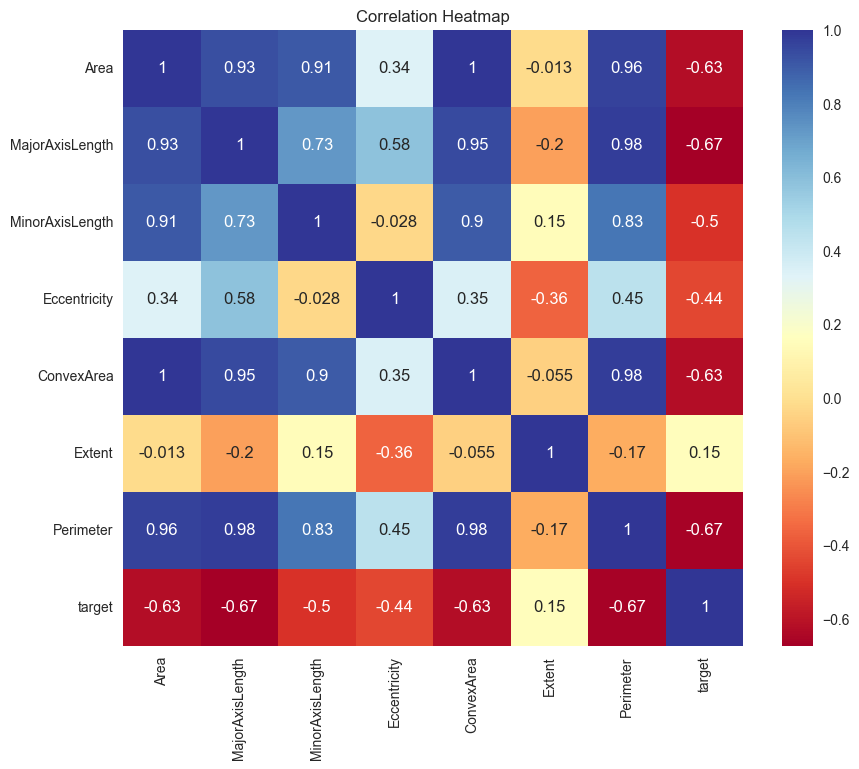

In [301]:
# Compute the correlation matrix
corr_matrix = df.select_dtypes('number').corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='RdYlBu', annot=True)
plt.title('Correlation Heatmap')
plt.show()

## **Seleccionar las mejores caracteristicas**

In [302]:
# este truco no sabia.
Selected_features=corr_matrix.index[abs(corr_matrix['target'])>=0.6].tolist()
Selected_features.remove('target')   
Selected_features

['Area', 'MajorAxisLength', 'ConvexArea', 'Perimeter']

Características seleccionadas: Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'Perimeter'],
      dtype='object')
Ranking de las características: [1 1 1 1 2 3 1]


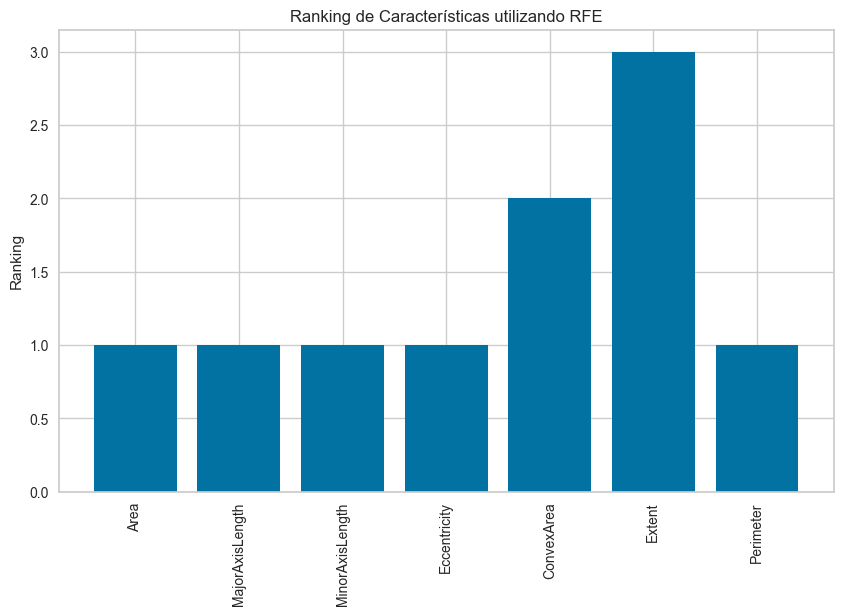

In [303]:
X=df.drop(['target'],axis=1)
y=df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=50)
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr=LogisticRegression()
selector = RFE(estimator=lr, n_features_to_select=5, step=1)
selector = selector.fit(X_train_scaled, y_train)
# Obtener las características seleccionadas
selected_features = X.columns[selector.support_]
ranking = selector.ranking_
# Mostrar las características seleccionadas y su ranking
print("Características seleccionadas:", selected_features)
print("Ranking de las características:", ranking)
# Plotear el ranking de las características
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), ranking, align="center")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.ylabel('Ranking')
plt.title('Ranking de Características utilizando RFE')
plt.show()

Características seleccionadas: Index(['MinorAxisLength', 'Eccentricity', 'Extent', 'Perimeter'], dtype='object')
Ranking de las características: [3 2 1 1 4 1 1]


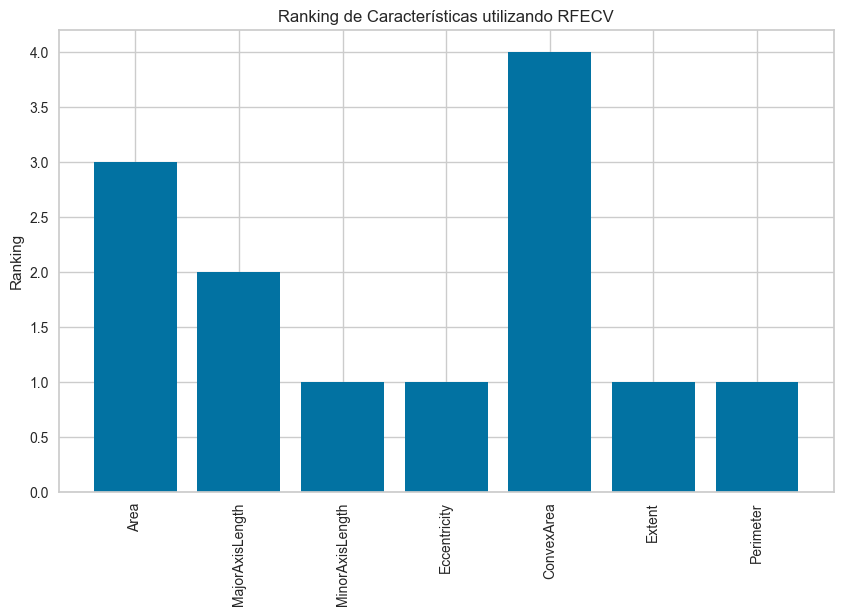

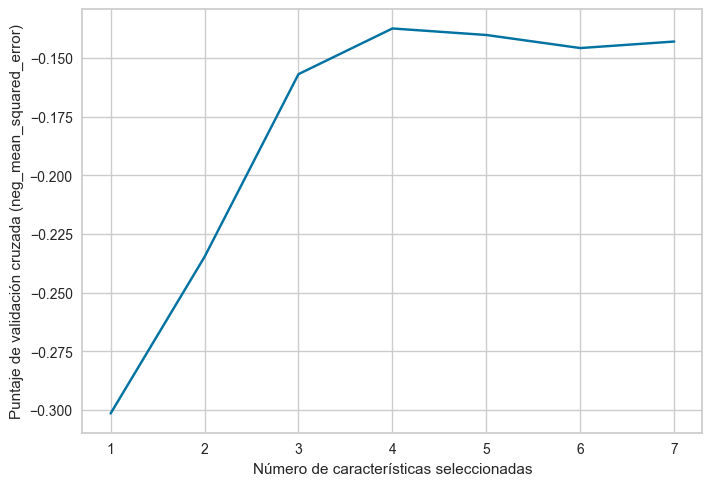

In [304]:
from sklearn.feature_selection import RFECV

# Crear el selector RFECV con el modelo de regresión lineal
selector_cv = RFECV(estimator=lr, step=1, cv=5, scoring='neg_mean_squared_error')
selector_cv = selector_cv.fit(X_train, y_train)

# Obtener las características seleccionadas
selected_features_cv = X.columns[selector_cv.support_]
ranking_cv = selector_cv.ranking_

# Mostrar las características seleccionadas y su ranking
print("Características seleccionadas:", selected_features_cv)
print("Ranking de las características:", ranking_cv)

# Plotear el ranking de las características
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), ranking_cv, align="center")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.ylabel('Ranking')
plt.title('Ranking de Características utilizando RFECV')
plt.show()

# Plotear el número óptimo de características
plt.figure()
plt.xlabel("Número de características seleccionadas")
plt.ylabel("Puntaje de validación cruzada (neg_mean_squared_error)")
plt.plot(range(1, len(selector_cv.cv_results_['mean_test_score']) + 1), selector_cv.cv_results_['mean_test_score'])
plt.show()


## **Modelos de Clasificación**

* https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [311]:
df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,target
0,87524.0,442.246011,253.291155,0.819738,90546.0,0.758651,1184.040,1
1,75166.0,406.690687,243.032436,0.801805,78789.0,0.684130,1121.786,1
2,90856.0,442.267048,266.328318,0.798354,93717.0,0.637613,1208.575,1
3,45928.0,286.540559,208.760042,0.684989,47336.0,0.699599,844.162,1
4,79408.0,352.190770,290.827533,0.564011,81463.0,0.792772,1073.251,1


### **Logistic Regression**

In [317]:
df_new=df[['Area', 'MajorAxisLength', 'ConvexArea', 'Perimeter', 'target']]
X=df_new.drop(['target'],axis=1)
y=df_new['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
lr=LogisticRegression(class_weight='balanced')
params={
    'penalty':['l1','l2'],
    'C':np.logspace(-1, 5, 20),
    "solver" : ["liblinear"],
    'max_iter':[100,1000,10000]
}
grid_search=GridSearchCV(lr, params, cv=10)
# Ajusta la búsqueda de cuadrícula al conjunto de entrenamiento
grid_search.fit(X_train_scaled, y_train)
# Los mejores hiperparámetros encontrados
print(grid_search.best_params_)

{'C': 0.8858667904100825, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}


In [318]:
# Inicializa el modelo de regresión logística con los mejores parámetros
lr = LogisticRegression(**grid_search.best_params_)
# Ajusta el modelo a los datos de entrenamiento
lr.fit(X_train, y_train)

LogisticRegression(C=0.8858667904100825, solver='liblinear')

In [319]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print()
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

In [320]:
eval_metric(lr,X_train_scaled, y_train, X_test_scaled, y_test)

Train_Set
[[266  84]
 [ 37 333]]
              precision    recall  f1-score   support

           0       0.88      0.76      0.81       350
           1       0.80      0.90      0.85       370

    accuracy                           0.83       720
   macro avg       0.84      0.83      0.83       720
weighted avg       0.84      0.83      0.83       720


Test_Set
[[69 31]
 [ 9 71]]
              precision    recall  f1-score   support

           0       0.88      0.69      0.78       100
           1       0.70      0.89      0.78        80

    accuracy                           0.78       180
   macro avg       0.79      0.79      0.78       180
weighted avg       0.80      0.78      0.78       180



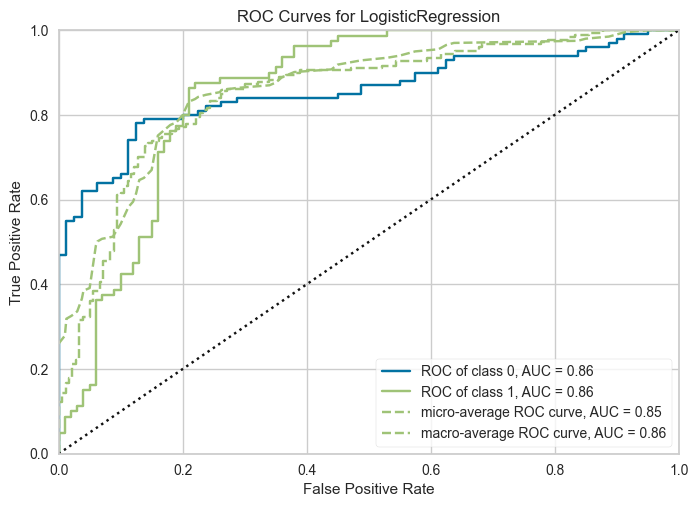

In [321]:
from yellowbrick.classifier import ROCAUC
model = lr
visualizer = ROCAUC(model)

visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

### **KNN**

In [326]:
# LOS VECINOS HERMANOS
from sklearn.neighbors import KNeighborsClassifier
knn_grid = KNeighborsClassifier()
k_values= range(1,30)
param_grid = {"n_neighbors":k_values, "p": [1,2], "weights": ['uniform', "distance"]}
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [327]:
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Train_Set
[[289  61]
 [ 30 340]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.86       350
           1       0.85      0.92      0.88       370

    accuracy                           0.87       720
   macro avg       0.88      0.87      0.87       720
weighted avg       0.88      0.87      0.87       720


Test_Set
[[84 16]
 [ 8 72]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       100
           1       0.82      0.90      0.86        80

    accuracy                           0.87       180
   macro avg       0.87      0.87      0.87       180
weighted avg       0.87      0.87      0.87       180



### **DecisionTreeClassifier**

In [328]:
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier()
params={
    "splitter":["best", "random"],
    "max_features":[2, 3],
    "max_depth": [None, 2, 3, 4, 5],
    "min_samples_leaf": [1, 2, 3, 4],
    "min_samples_split": [2, 3, 5, 6],
    "criterion":['gini', 'entropy', 'log_loss']
}
grid_model = GridSearchCV(estimator=tree,
                          param_grid=params,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [2, 3],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 5, 6],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [329]:
grid_model.best_params_

{'criterion': 'log_loss',
 'max_depth': 2,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'splitter': 'best'}

In [330]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)

Train_Set
[[287  63]
 [ 32 338]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       350
           1       0.84      0.91      0.88       370

    accuracy                           0.87       720
   macro avg       0.87      0.87      0.87       720
weighted avg       0.87      0.87      0.87       720


Test_Set
[[79 21]
 [ 7 73]]
              precision    recall  f1-score   support

           0       0.92      0.79      0.85       100
           1       0.78      0.91      0.84        80

    accuracy                           0.84       180
   macro avg       0.85      0.85      0.84       180
weighted avg       0.86      0.84      0.84       180



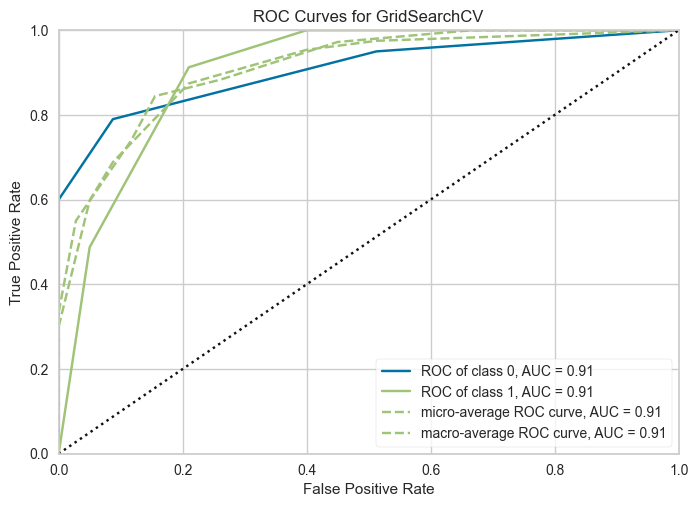

In [331]:
model = grid_model
visualizer = ROCAUC(model)
visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show();